In [1]:
import pandas as pd
news=pd.read_csv('news.csv')

In [2]:
news['date'] = pd.to_datetime(news['date'])

In [3]:
news.head()

,title,date,press,text
0,Compendium of Writings About the 2024 Election...,2024-10-31,reason,"As election day approaches, here are links to ..."
1,Newspaper Endorsements Die in Daylight,2024-10-31,reason,It sure has been a banner week for the triple ...
2,"Dave Smith, David Stockman, and Jacob Grier: W...",2024-10-31,reason,HD Video DownloadIs this the most important el...
3,Live On Election Eve With The Reason Roundtable!,2024-10-31,reason,Will Election 2024 result in an orderly transf...
4,"To Get Through the Election, Use Ozempic",2024-10-30,reason,The two major party candidates provide ample r...


In [4]:
news['press'].unique()

array(['reason', 'cbs', 'NPR'], dtype=object)

In [5]:
news.loc[news['press'] == 'reason', 'bias'] = 'Right'
news.loc[news['press'] == 'NPR', 'bias'] = 'Center'
news.loc[news['press'] == 'cbs', 'bias'] = 'Left'

In [6]:
news['bias'].sample(5)

,bias
474,Left
102,Right
367,Left
222,Left
565,Center


In [7]:
def count_mentions(text, keyword):
    if isinstance(text, str):
        return text.lower().count(keyword)
    return 0

news['trump_count'] = news['text'].apply(lambda x: count_mentions(x, 'trump'))
news['harris_count'] = news['text'].apply(lambda x: count_mentions(x, 'harris'))

In [8]:
count=news.groupby(['bias'])[['trump_count','harris_count']].sum()

<Axes: xlabel='Political Bias'>

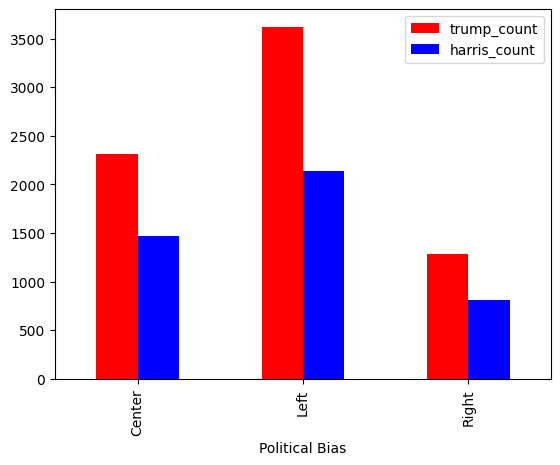

In [9]:
count.plot(kind='bar',xlabel='Political Bias',color=('r','b'))

In [10]:
date_count=news.groupby(['date'])[['trump_count','harris_count']].sum()
date_count=date_count.T
date_count['name']=['Trump','Harris']
date_count.set_index('name', inplace=True)

In [11]:
date_count

date,2024-08-22,2024-08-23,2024-08-26,2024-08-27,2024-08-28,2024-08-29,2024-08-30,2024-08-31,2024-09-01,2024-09-02,...,2024-10-24,2024-10-25,2024-10-26,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02
name,,,,,,,,,,,,,,,,,,,,,
Trump,3,22,32,41,75,130,91,22,27,13,...,224,186,75,254,203,325,224,43,154,31
Harris,1,40,18,33,15,90,56,14,14,17,...,202,71,44,145,120,179,106,39,95,37


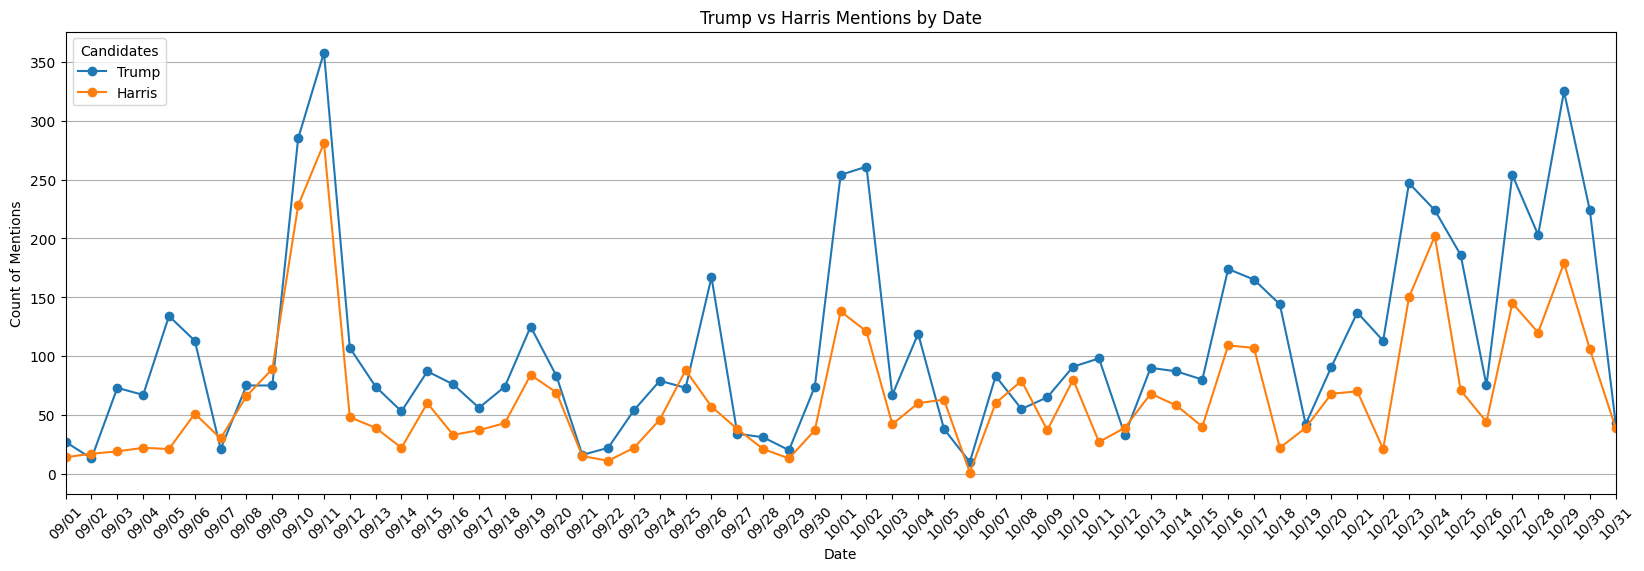

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

date_count.columns = pd.to_datetime(date_count.columns, format='%m/%d')

date_range = pd.date_range(start='2024-09-01', end='2024-10-31')

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(20, 6)
date_count.T.reindex(date_range).plot(kind='line', marker='o')  # 선 그래프 그리기

plt.title('Trump vs Harris Mentions by Date')
plt.xlabel('Date')
plt.ylabel('Count of Mentions')

plt.xticks(ticks=date_range, labels=date_range.strftime('%m/%d'), rotation=45)

plt.grid(axis='y')
plt.legend(title='Candidates')

plt.show()  #

<Figure size 1200x600 with 0 Axes>

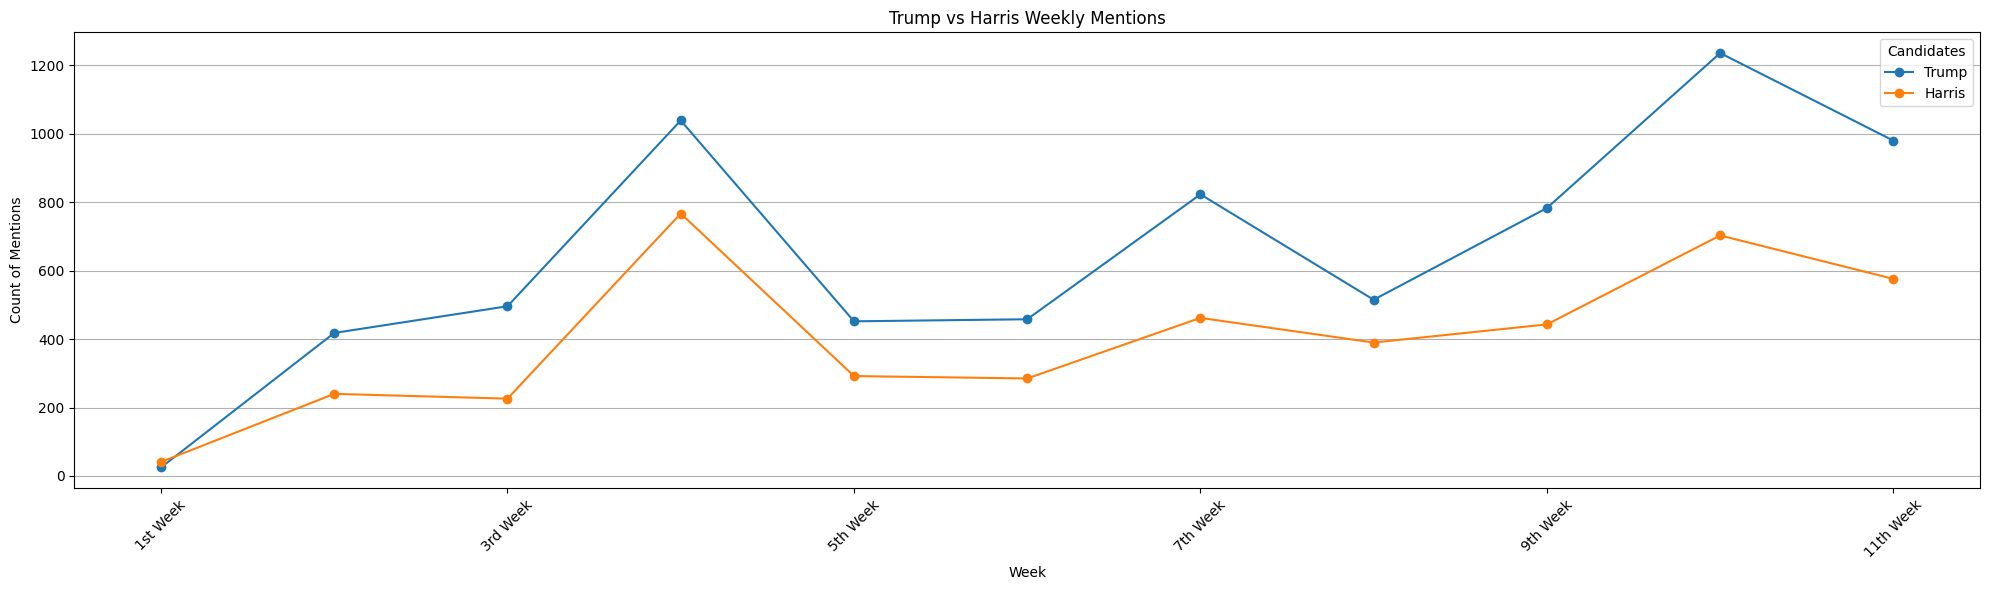

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

date_count.columns = pd.to_datetime(date_count.columns, format='%Y-%m-%d')

date_count_weekly = date_count.T.resample('W').sum().T

weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(date_count_weekly.shape[1])]
date_count_weekly.columns = weeks

plt.figure(figsize=(12, 6))
date_count_weekly.T.plot(kind='line', marker='o')

plt.title('Trump vs Harris Weekly Mentions')
plt.xlabel('Week')
plt.ylabel('Count of Mentions')

plt.xticks(rotation=45)

plt.grid(axis='y')
plt.legend(title='Candidates')

plt.tight_layout()
plt.show()


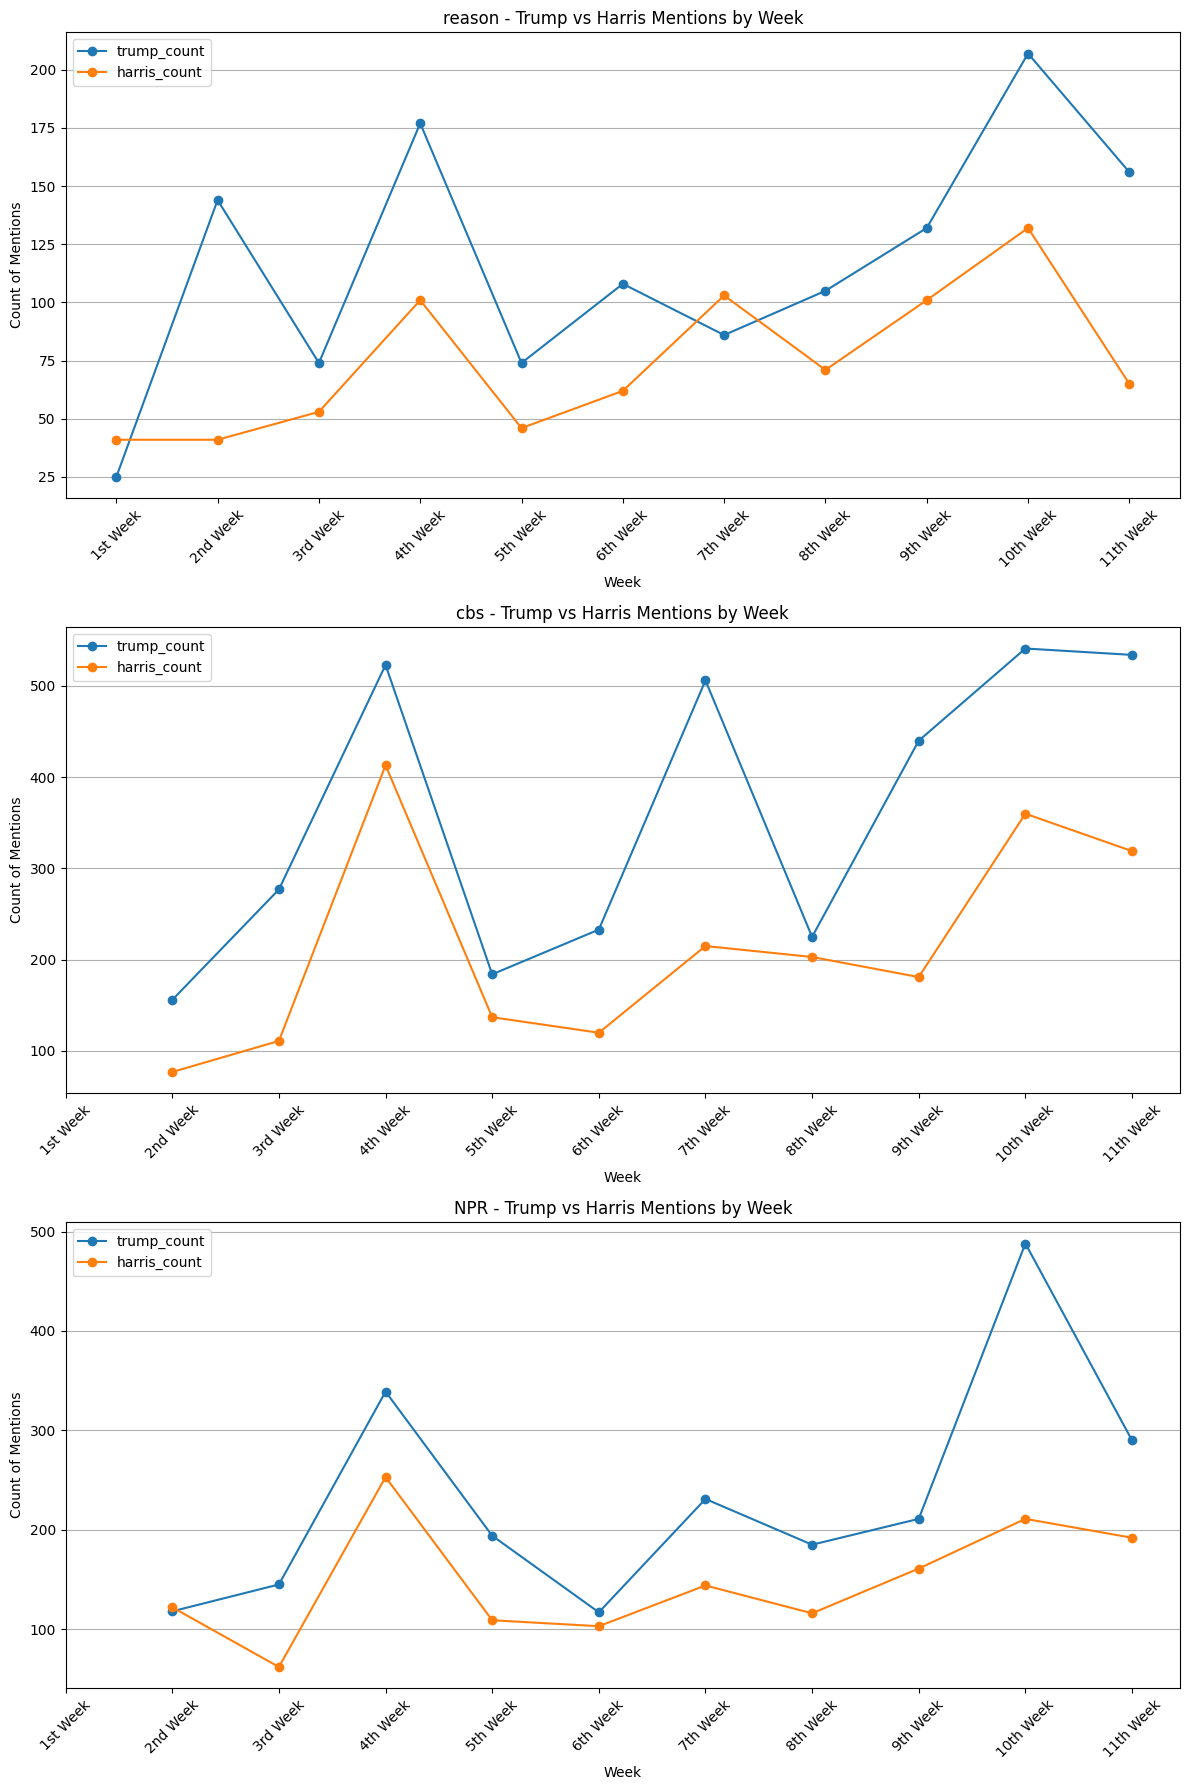

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

news['date'] = pd.to_datetime(news['date'], format='%B %d, %Y')

weekly_press_counts = news.groupby([pd.Grouper(key='date', freq='W'), 'press'])[['trump_count', 'harris_count']].sum().unstack()

weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(weekly_press_counts.shape[0])]
weekly_press_counts.index = weeks

presses = news['press'].unique()


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, press in enumerate(presses):
    press_data = weekly_press_counts.xs(press, level='press', axis=1)

    press_data.plot(kind='line', marker='o', ax=axes[i])

    axes[i].set_title(f'{press} - Trump vs Harris Mentions by Week')
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Count of Mentions')
    axes[i].grid(axis='y')
    axes[i].set_xticks(range(len(weeks)))
    axes[i].set_xticklabels(weeks, rotation=45)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['text'].fillna(''))

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})

top_10_words = word_freq.sort_values(by='count', ascending=False).head(10)

print(top_10_words)

            word  count
21206      trump   7180
18067       said   5194
9641      harris   4399
15980  president   3467
7027    election   3019
19608      state   2292
22238     voters   2039
3375    campaign   1999
15224     people   1960
14026       news   1527


In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    words = word_tokenize(text.lower())
    pos_tagged_words = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)

news['processed_text'] = news['text'].fillna('').apply(preprocess)

custom_stop_words = ['trump', 'harris','say','would','make','also']

vectorizer = CountVectorizer(stop_words=custom_stop_words)

X = vectorizer.fit_transform(news['processed_text'])

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_10_words = word_freq.sort_values(by='count', ascending=False).head(10)

In [ ]:
top_10_words

,word,count
7820,president,1591
9579,state,1382
3193,election,1195
1359,campaign,937
10912,voter,866
10910,vote,841
2447,debate,798
7456,people,757
11230,year,753
8482,republican,701


In [20]:
!pip install squarify

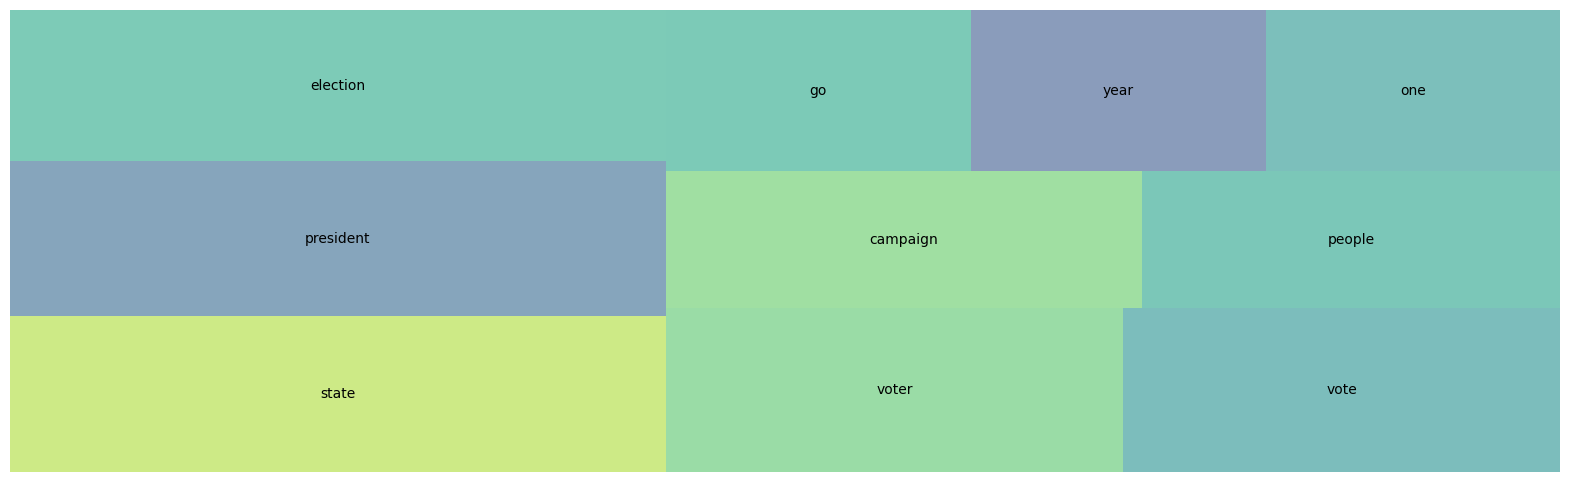

In [21]:
import squarify

squarify.plot(sizes=top_10_words['count'], label=top_10_words['word'],alpha=0.59)
plt.axis('off')
plt.savefig('ww.jpg')
plt.show();

In [23]:
import re

def preprocess_text(text):
    if pd.isnull(text):
        return ''

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = word_tokenize(text.lower())
    pos_tagged_words = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)


news['cleaned_text'] = news['text'].apply(preprocess_text)

custom_stop_words = ['trump', 'harris','say','would','make','also','cbs','go']
vectorizer = CountVectorizer(stop_words=custom_stop_words)

bias_word_counts = {}

for bias in news['bias'].unique():
    filtered_text = news[news['bias'] == bias]['cleaned_text']
    X = vectorizer.fit_transform(filtered_text)
    word_counts = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names_out()

    bias_word_counts[bias] = pd.DataFrame({'word': words, 'count': word_counts})


for bias, df in bias_word_counts.items():
    print(f"Top words for bias '{bias}':")
    top_words = df.sort_values(by='count', ascending=False).head(10)
    print(top_words)
    print("\n")

Top words for bias 'Right':
            word  count
12115      state    499
9884   president    447
9359     percent    382
8841         one    380
14439       year    367
9344      people    362
9645      policy    361
8449         new    345
13934       vote    325
508     american    315


Top words for bias 'Left':
            word  count
12255  president   1864
15102      state   1544
4945    election   1481
2089    campaign   1156
17332      voter   1138
10499       news   1036
17297       vote   1016
6136      former    866
11587     people    813
13543      right    746


Top words for bias 'Center':
             word  count
3275     election   1525
9998        state   1388
11440       voter   1141
11429        vote   1119
8199    president   1083
1409     campaign    759
7812       people    725
11880        year    636
7418          one    614
8874   republican    597


